In [7]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns

%matplotlib inline

In [8]:
! pip install pyforest

from pyforest import*

lazy_imports()

['from sklearn.model_selection import cross_val_score',
 'from sklearn import metrics',
 'from sklearn.ensemble import RandomForestClassifier',
 'import tensorflow as tf',
 'import textblob',
 'from PIL import Image',
 'import plotly as py',
 'from sklearn.linear_model import Ridge',
 'import pickle',
 'import pydot',
 'import gensim',
 'from sklearn.feature_extraction.text import CountVectorizer',
 'import altair as alt',
 'import spacy',
 'from fbprophet import Prophet',
 'from statsmodels.tsa.arima_model import ARIMA',
 'import cv2',
 'import bokeh',
 'import statsmodels.api as sm',
 'from pyspark import SparkContext',
 'from scipy import stats',
 'import lightgbm as lgb',
 'from sklearn.preprocessing import OneHotEncoder',
 'from sklearn.manifold import TSNE',
 'import fbprophet',
 'from sklearn.linear_model import RidgeCV',
 'import awswrangler as wr',
 'from scipy import signal as sg',
 'import plotly.express as px',
 'from sklearn.linear_model import Lasso',
 'import numpy as np

In [9]:
data = pd.read_csv("breastCancer.csv")
data.head()

<IPython.core.display.Javascript object>

,id,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


# Data Pre-processing

In [10]:
data['class'].value_counts()

2    458
4    241
Name: class, dtype: int64

In [11]:
data.dtypes

id                    int64
clump_thickness       int64
size_uniformity       int64
shape_uniformity      int64
marginal_adhesion     int64
epithelial_size       int64
bare_nucleoli        object
bland_chromatin       int64
normal_nucleoli       int64
mitoses               int64
class                 int64
dtype: object

In [12]:
data["bare_nucleoli"]

0       1
1      10
2       2
3       4
4       1
       ..
694     2
695     1
696     3
697     4
698     5
Name: bare_nucleoli, Length: 699, dtype: object

In [13]:
data[data["bare_nucleoli"] == '?'].sum()

id                           13721250
clump_thickness                    54
size_uniformity                    39
shape_uniformity                   46
marginal_adhesion                  29
epithelial_size                    39
bare_nucleoli        ????????????????
bland_chromatin                    50
normal_nucleoli                    44
mitoses                            16
class                              36
dtype: object

In [14]:
digits_in_bare_nucleoli = pd.DataFrame(data.bare_nucleoli.str.isdigit())
digits_in_bare_nucleoli

<IPython.core.display.Javascript object>

,bare_nucleoli
0,True
1,True
2,True
3,True
4,True
...,...
694,True
695,True
696,True
697,True


In [15]:
df = data.replace("?",np.nan)
df.head(30)

<IPython.core.display.Javascript object>

,id,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
5,1017122,8,10,10,8,7,10,9,7,1,4
6,1018099,1,1,1,1,2,10,3,1,1,2
7,1018561,2,1,2,1,2,1,3,1,1,2
8,1033078,2,1,1,1,2,1,1,1,5,2
9,1033078,4,2,1,1,2,1,2,1,1,2


In [16]:
df["bare_nucleoli"] == 'NAN'

0      False
1      False
2      False
3      False
4      False
       ...  
694    False
695    False
696    False
697    False
698    False
Name: bare_nucleoli, Length: 699, dtype: bool

In [17]:
df.median()

id                   1171710.0
clump_thickness            4.0
size_uniformity            1.0
shape_uniformity           1.0
marginal_adhesion          1.0
epithelial_size            2.0
bare_nucleoli              1.0
bland_chromatin            3.0
normal_nucleoli            1.0
mitoses                    1.0
class                      2.0
dtype: float64

In [18]:
df= df.fillna(df.median())

In [19]:
df['bare_nucleoli'].head(30)

0       1
1      10
2       2
3       4
4       1
5      10
6      10
7       1
8       1
9       1
10      1
11      1
12      3
13      3
14      9
15      1
16      1
17      1
18     10
19      1
20     10
21      7
22      1
23    1.0
24      1
25      7
26      1
27      1
28      1
29      1
Name: bare_nucleoli, dtype: object

In [20]:
df.dtypes

id                    int64
clump_thickness       int64
size_uniformity       int64
shape_uniformity      int64
marginal_adhesion     int64
epithelial_size       int64
bare_nucleoli        object
bland_chromatin       int64
normal_nucleoli       int64
mitoses               int64
class                 int64
dtype: object

In [21]:
df.dtypes

id                    int64
clump_thickness       int64
size_uniformity       int64
shape_uniformity      int64
marginal_adhesion     int64
epithelial_size       int64
bare_nucleoli        object
bland_chromatin       int64
normal_nucleoli       int64
mitoses               int64
class                 int64
dtype: object

In [22]:
df.drop('id',axis=1,inplace=True)

In [23]:
df.head(30)

,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses,class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2
5,8,10,10,8,7,10,9,7,1,4
6,1,1,1,1,2,10,3,1,1,2
7,2,1,2,1,2,1,3,1,1,2
8,2,1,1,1,2,1,1,1,5,2
9,4,2,1,1,2,1,2,1,1,2


In [24]:
df.dtypes

clump_thickness       int64
size_uniformity       int64
shape_uniformity      int64
marginal_adhesion     int64
epithelial_size       int64
bare_nucleoli        object
bland_chromatin       int64
normal_nucleoli       int64
mitoses               int64
class                 int64
dtype: object

In [25]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
clump_thickness,699.0,4.417740,2.815741,1.0,2.0,4.0,6.0,10.0
size_uniformity,699.0,3.134478,3.051459,1.0,1.0,1.0,5.0,10.0
shape_uniformity,699.0,3.207439,2.971913,1.0,1.0,1.0,5.0,10.0
marginal_adhesion,699.0,2.806867,2.855379,1.0,1.0,1.0,4.0,10.0
epithelial_size,699.0,3.216023,2.214300,1.0,2.0,2.0,4.0,10.0
bland_chromatin,699.0,3.437768,2.438364,1.0,2.0,3.0,5.0,10.0
normal_nucleoli,699.0,2.866953,3.053634,1.0,1.0,1.0,4.0,10.0
mitoses,699.0,1.589413,1.715078,1.0,1.0,1.0,1.0,10.0
class,699.0,2.689557,0.951273,2.0,2.0,2.0,4.0,4.0


<IPython.core.display.Javascript object>

C:\Users\santh\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='class', ylabel='Density'>

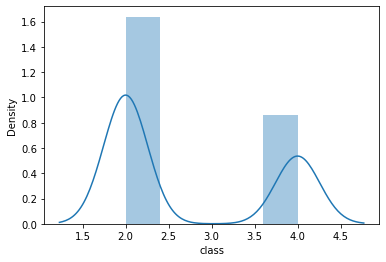

In [26]:
sns.distplot(df['class'])

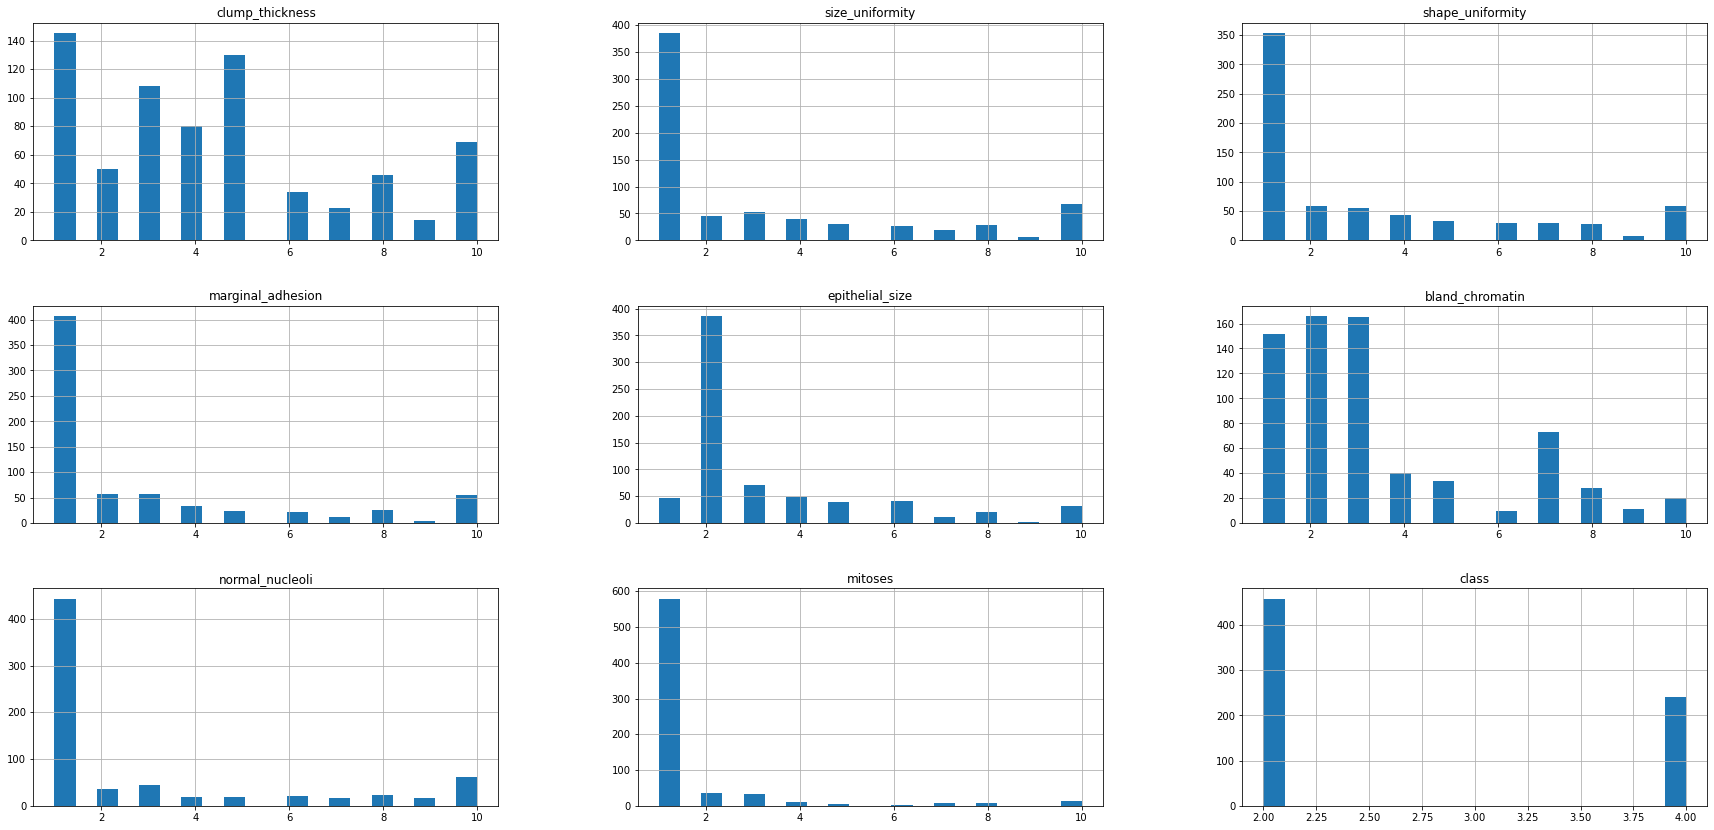

In [27]:
df.hist(bins=20, figsize=(30,30),layout=(6,3));

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<AxesSubplot:>

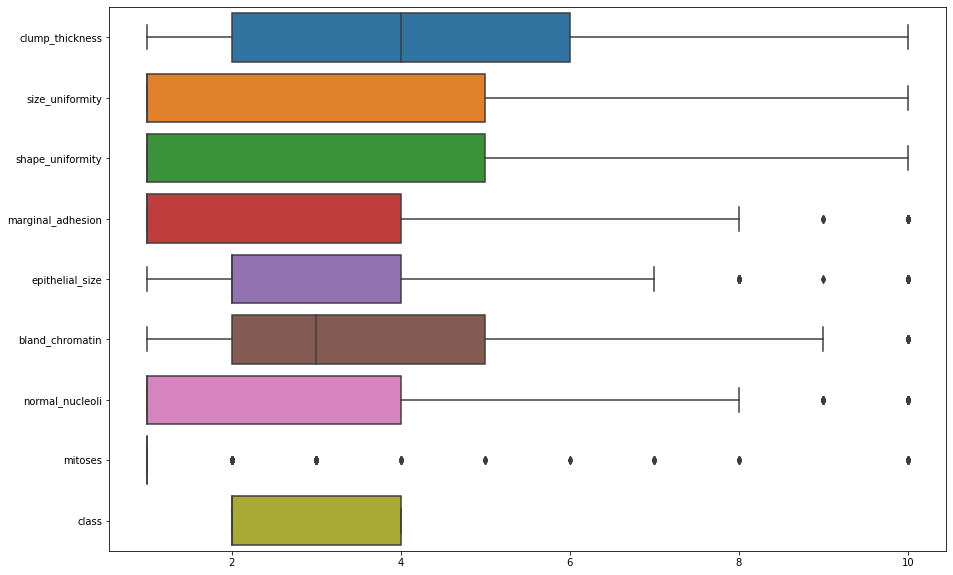

In [28]:
plt.figure(figsize=(15,10))
sns.boxplot(data=df,orient= 'h')

In [29]:
df.corr()

,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bland_chromatin,normal_nucleoli,mitoses,class
clump_thickness,1.000000,0.644913,0.654589,0.486356,0.521816,0.558428,0.535835,0.350034,0.716001
size_uniformity,0.644913,1.000000,0.906882,0.705582,0.751799,0.755721,0.722865,0.458693,0.817904
shape_uniformity,0.654589,0.906882,1.000000,0.683079,0.719668,0.735948,0.719446,0.438911,0.818934
marginal_adhesion,0.486356,0.705582,0.683079,1.000000,0.599599,0.666715,0.603352,0.417633,0.696800
epithelial_size,0.521816,0.751799,0.719668,0.599599,1.000000,0.616102,0.628881,0.479101,0.682785
bland_chromatin,0.558428,0.755721,0.735948,0.666715,0.616102,1.000000,0.665878,0.344169,0.756616
normal_nucleoli,0.535835,0.722865,0.719446,0.603352,0.628881,0.665878,1.000000,0.428336,0.712244
mitoses,0.350034,0.458693,0.438911,0.417633,0.479101,0.344169,0.428336,1.000000,0.423170
class,0.716001,0.817904,0.818934,0.696800,0.682785,0.756616,0.712244,0.423170,1.000000


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

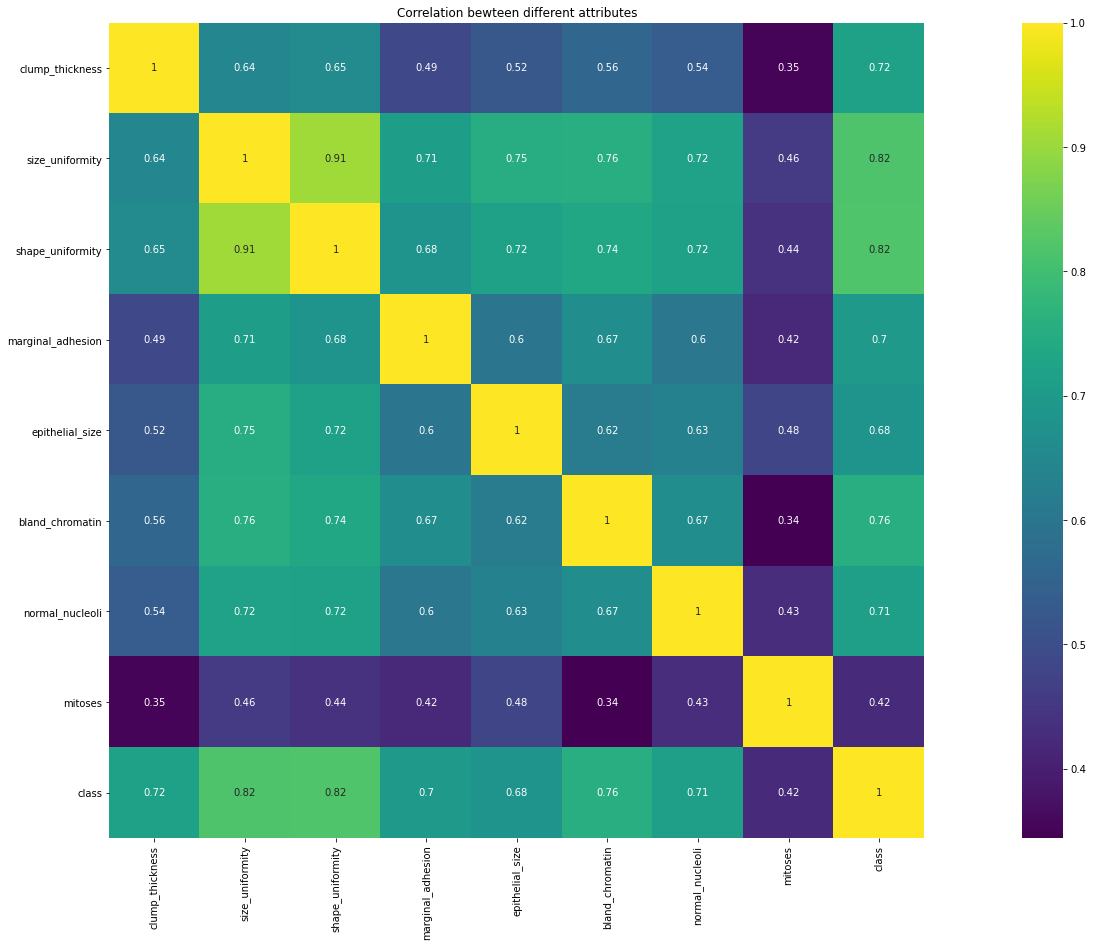

In [30]:
plt.figure(figsize=(35,15))
sns.heatmap(df.corr(),vmax=1,square=True,annot=True,cmap='viridis')
plt.title("Correlation bewteen different attributes")
plt.show()

sns.pairplot(df,diag_kind='kde')

<IPython.core.display.Javascript object>

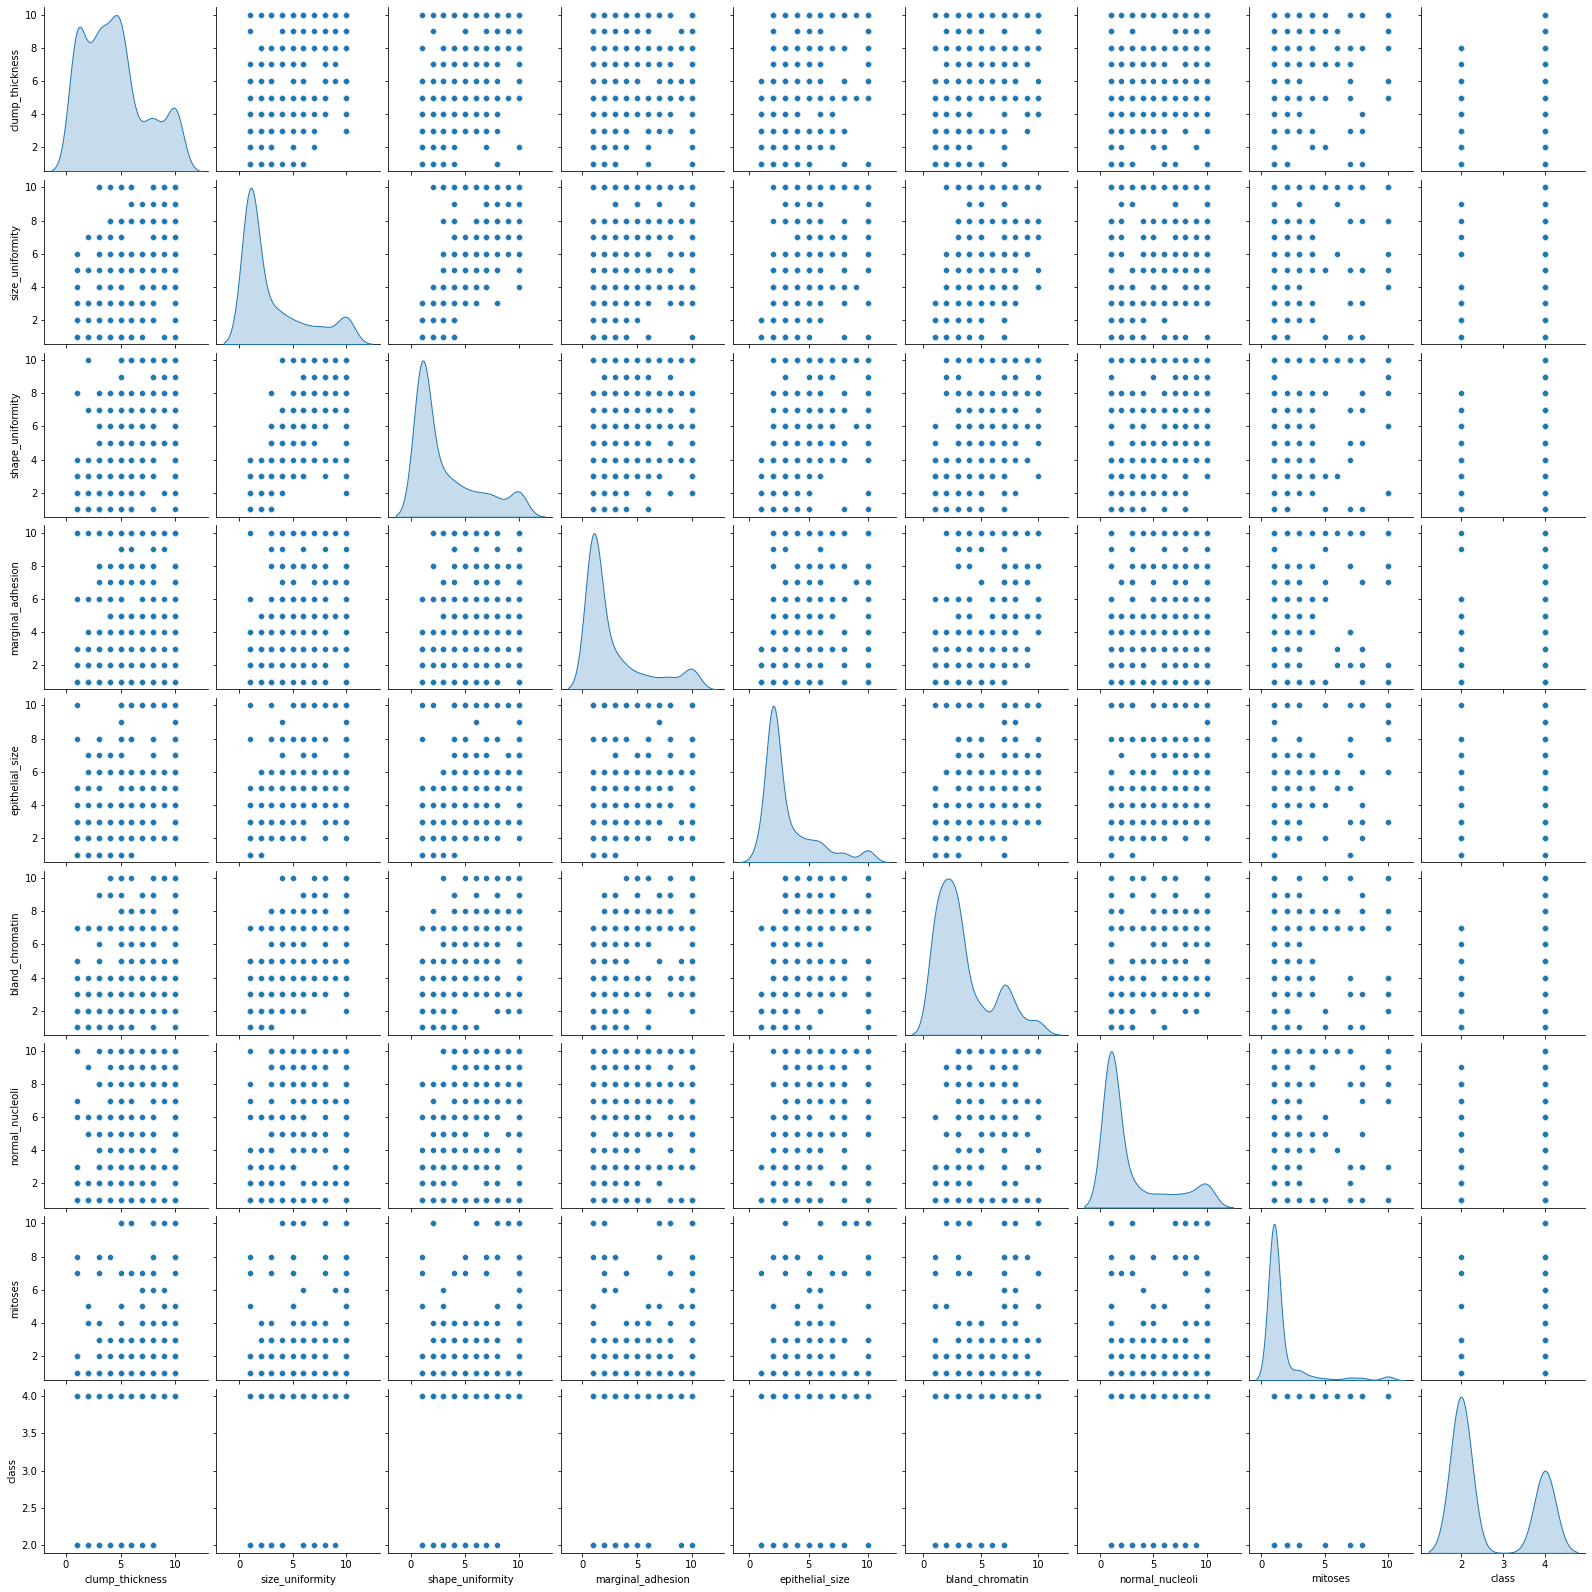

In [31]:
sns.pairplot(df,diag_kind='kde')

# Building Our Model

In [32]:
x = df.drop('class',axis =1)
y= df['class']
x
y

0      2
1      2
2      2
3      2
4      2
      ..
694    2
695    2
696    4
697    4
698    4
Name: class, Length: 699, dtype: int64

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=1)

# KNeighborsClassifier

In [35]:
from sklearn.neighbors import KNeighborsClassifier

In [36]:
KNN = KNeighborsClassifier(n_neighbors=5,weights='distance')

In [37]:
KNN.fit(X_train,y_train)

KNeighborsClassifier(weights='distance')

In [38]:
predicted_1 = KNN.predict(X_test)

In [39]:
predicted_1

array([2, 2, 2, 4, 2, 2, 4, 2, 2, 2, 4, 4, 2, 2, 4, 4, 2, 2, 2, 2, 2, 4,
       4, 2, 4, 2, 4, 4, 2, 2, 2, 4, 4, 4, 4, 4, 2, 4, 2, 2, 2, 2, 2, 2,
       2, 4, 2, 2, 2, 2, 2, 2, 4, 2, 4, 4, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 4, 2, 2, 2, 2, 2, 2, 4, 4, 2, 2, 2, 2, 4, 4, 2, 4, 2, 2, 2, 4,
       4, 2, 4, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 4, 2, 2, 4, 4, 2, 4, 2,
       4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 2, 2, 2, 4, 2, 2, 2, 4,
       4, 2, 4, 2, 2, 2, 4, 4, 2, 4, 2, 2, 2, 4, 2, 4, 2, 2, 2, 2, 2, 4,
       2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 4, 4, 2, 2, 2, 2, 2, 2, 4, 2, 2, 4,
       4, 4, 4, 4, 4, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 4, 2, 4, 4, 4,
       4, 2, 2, 2, 2, 2, 4, 4, 4, 2, 2, 2], dtype=int64)

In [40]:
X_test

,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses
584,5,1,1,6,3,1,1,1,1
417,1,1,1,1,2,1,2,1,1
606,4,1,1,2,2,1,1,1,1
349,4,2,3,5,3,8,7,6,1
134,3,1,1,1,3,1,2,1,1
...,...,...,...,...,...,...,...,...,...
440,10,4,3,10,4,10,10,1,1
299,9,1,2,6,4,10,7,7,2
577,1,1,1,1,2,1,2,1,1
103,8,2,3,1,6,3,7,1,1


In [41]:

from scipy.stats import zscore
print("KNieghbors Classifier predictions at {0:.2g}%".format(KNN.score(X_test,y_test)*100))

KNieghbors Classifier predictions at 97%


# Supprt Vector Machine

In [42]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(X_train,y_train)


SVC()

In [43]:
predicted_2 = svc.predict(X_test)

In [44]:
predicted_2

array([2, 2, 2, 4, 2, 2, 4, 2, 2, 2, 4, 4, 2, 4, 4, 4, 2, 2, 2, 2, 2, 4,
       4, 2, 4, 2, 4, 4, 2, 2, 2, 4, 4, 4, 4, 4, 2, 4, 2, 2, 2, 2, 2, 2,
       2, 4, 2, 2, 2, 2, 2, 2, 4, 2, 4, 2, 4, 2, 2, 4, 2, 2, 2, 2, 2, 2,
       2, 4, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 4, 4, 2, 4, 2, 2, 2, 4,
       4, 2, 4, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 4, 2, 2, 4, 4, 2, 4, 2,
       4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 2, 4, 2, 4, 2, 2, 2, 4,
       4, 2, 4, 2, 2, 2, 4, 4, 2, 4, 2, 2, 2, 4, 2, 4, 2, 2, 2, 2, 2, 4,
       2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 4, 4, 2, 2, 2, 2, 2, 4, 4, 2, 2, 4,
       4, 4, 4, 4, 4, 2, 2, 2, 2, 4, 2, 2, 4, 2, 2, 2, 2, 4, 2, 4, 4, 4,
       4, 2, 2, 2, 2, 2, 4, 4, 4, 2, 4, 2], dtype=int64)

In [45]:
print("support vector predictions at {0:.2g}%".format(svc.score(X_test,y_test)*100))

support vector predictions at 98%


In [46]:
knnpredictions = pd.DataFrame(predicted_1)
svcpredictions = pd.DataFrame(predicted_2)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [47]:
df1 = pd.concat([knnpredictions,svcpredictions],axis=1)
df1

<IPython.core.display.Javascript object>

,0,0
0,2,2
1,2,2
2,2,2
3,4,4
4,2,2
...,...,...
205,4,4
206,4,4
207,2,2
208,2,4


In [48]:
df1.columns=[['knnpredictions','svcpredictions']]
df1

,knnpredictions,svcpredictions
0,2,2
1,2,2
2,2,2
3,4,4
4,2,2
...,...,...
205,4,4
206,4,4
207,2,2
208,2,4


In [49]:
from sklearn.metrics import  classification_report

In [50]:
print("KNN Classiffication")
print(classification_report(y_test,predicted_1))

KNN Classiffication
              precision    recall  f1-score   support

           2       0.96      0.99      0.98       137
           4       0.99      0.93      0.96        73

    accuracy                           0.97       210
   macro avg       0.98      0.96      0.97       210
weighted avg       0.97      0.97      0.97       210



In [51]:
print("SVC Classiffication")
print(classification_report(y_test,predicted_2))

SVC Classiffication
              precision    recall  f1-score   support

           2       0.99      0.99      0.99       137
           4       0.97      0.97      0.97        73

    accuracy                           0.98       210
   macro avg       0.98      0.98      0.98       210
weighted avg       0.98      0.98      0.98       210



confusion matrix fo rKNN


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<AxesSubplot:>

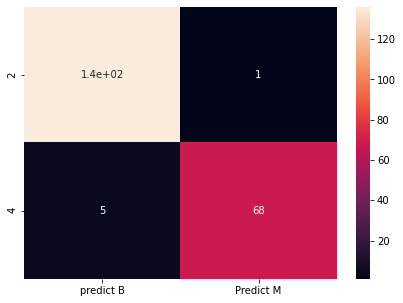

In [54]:
from sklearn.metrics import confusion_matrix

print("confusion matrix fo rKNN")
cm = confusion_matrix(y_test,predicted_1,labels=[2,4])

df_cm = pd.DataFrame(cm,index=[i for i in [2,4]],columns=[i for i in ['predict B','Predict M']])
plt.figure(figsize=(7,5))
sns.heatmap(df_cm,annot=True)

confusion matrix for SVM


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<AxesSubplot:>

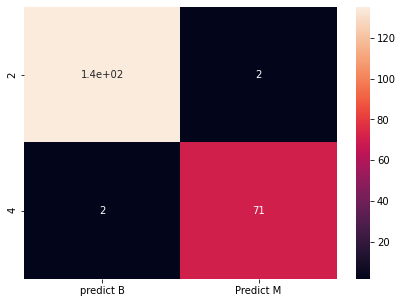

In [55]:
from sklearn.metrics import confusion_matrix

print("confusion matrix for SVM")
cm = confusion_matrix(y_test,predicted_2,labels=[2,4])

df_cm = pd.DataFrame(cm,index=[i for i in [2,4]],columns=[i for i in ['predict B','Predict M']])
plt.figure(figsize=(7,5))
sns.heatmap(df_cm,annot=True)